In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

### Column headers are values, not variable names

In [49]:
# hide
df = pd.read_csv('./tidy-data/pew.csv')

In [50]:
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


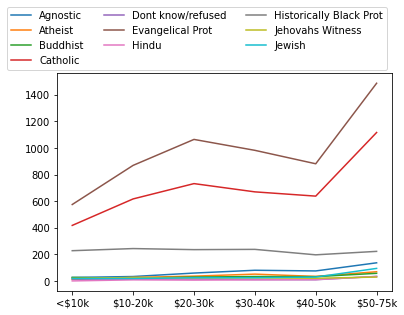

In [51]:
# hide
df.set_index('religion').T.plot(legend=True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.33),ncol=3)


In [52]:
df.columns.to_list()

['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k', '$50-75k']

In [53]:
df_melt = df.melt(id_vars="religion", var_name='income', value_name='freq')
df_melt


,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
...,...,...,...
55,Evangelical Prot,$50-75k,1486
56,Hindu,$50-75k,34
57,Historically Black Prot,$50-75k,223
58,Jehovahs Witness,$50-75k,30


In [54]:
df_melt

,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
...,...,...,...
55,Evangelical Prot,$50-75k,1486
56,Hindu,$50-75k,34
57,Historically Black Prot,$50-75k,223
58,Jehovahs Witness,$50-75k,30


In [55]:
df_melt.reset_index() \
       .sort_values(['religion', 'index']) \
       .drop(['index'], axis='columns') \
       .reset_index(drop=True) \
       .head(10)

,religion,income,freq
0,Agnostic,<$10k,27
1,Agnostic,$10-20k,34
2,Agnostic,$20-30k,60
3,Agnostic,$30-40k,81
4,Agnostic,$40-50k,76
5,Agnostic,$50-75k,137
6,Atheist,<$10k,12
7,Atheist,$10-20k,27
8,Atheist,$20-30k,37
9,Atheist,$30-40k,52


In [56]:
df_melt.sort_index().sort_values(by=["religion"])

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
...,...,...,...
39,Jewish,$30-40k,25
19,Jewish,$10-20k,19
9,Jewish,<$10k,19
49,Jewish,$40-50k,30


In [57]:
df.shape

(10, 7)

In [58]:
df_melt.shape

(60, 3)

In [59]:
df.memory_usage(deep=True).sum()

1292

In [60]:
df_melt.memory_usage(deep=True).sum()

8532

In [61]:
df_melt

,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
...,...,...,...
55,Evangelical Prot,$50-75k,1486
56,Hindu,$50-75k,34
57,Historically Black Prot,$50-75k,223
58,Jehovahs Witness,$50-75k,30


In [62]:
df_melt.pivot(index="religion", columns="income", values="freq")

income,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,<$10k
religion,,,,,,
Agnostic,34,60,81,76,137,27
Atheist,27,37,52,35,70,12
Buddhist,21,30,34,33,58,27
Catholic,617,732,670,638,1116,418
Dont know/refused,14,15,11,10,35,15
Evangelical Prot,869,1064,982,881,1486,575
Hindu,9,7,9,11,34,1
Historically Black Prot,244,236,238,197,223,228
Jehovahs Witness,27,24,24,21,30,20


In [63]:
df_melt.pivot(index="religion", columns="income", values="freq") \
       .reset_index()

income,religion,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,<$10k
0,Agnostic,34,60,81,76,137,27
1,Atheist,27,37,52,35,70,12
2,Buddhist,21,30,34,33,58,27
3,Catholic,617,732,670,638,1116,418
4,Dont know/refused,14,15,11,10,35,15
5,Evangelical Prot,869,1064,982,881,1486,575
6,Hindu,9,7,9,11,34,1
7,Historically Black Prot,244,236,238,197,223,228
8,Jehovahs Witness,27,24,24,21,30,20
9,Jewish,19,25,25,30,95,19
